In [26]:
%pylab inline
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [31]:
with open('LIST OF PRICED PUBLICATIONS.txt', 'r') as fl:
    lines = []
    for line in fl.readlines():
        try:
            no, rest = line.split('.', 1)
        except:
            lines[-1][0] += line.strip()
        else:
            no, rest = no.strip(), rest.strip()
            all_else = rest.split(' ')
            price = all_else[-1]
            title = ' '.join(all_else[:-1])
            lines.append([title, float(price)])

In [32]:
df = pd.DataFrame(lines)
df.columns = ['title', 'price']
df.head()

,title,price
0,Environmental Education Teachers’ Manual - I -...,75.0
1,Teachers’ Manual on Physical Education - I - V...,150.0
2,Physical Education Teachers’ Tops Cards – I-V ...,250.0
3,Alternatives to Home Work– I-V ...,90.0
4,Alternatives to Homework I-V (Hindi) ...,90.0


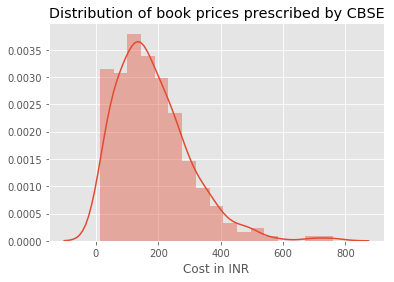

In [37]:
sns.distplot(df.price)
plt.xlabel('Cost in INR')
plt.title('Distribution of book prices prescribed by CBSE')

In [49]:
def getclass(i):
    clas = i.split('-')[-1].strip()
    clean = ''.join(i for i in clas if i in 'VIX')
    clas = clean if all([i in 'VIX' for i in clas]) else None
    return clas
romans = 'I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII'.split(',')
df['classes'] = df.title.apply(getclass).map({v: int(i+1) for i, v in enumerate(romans)})

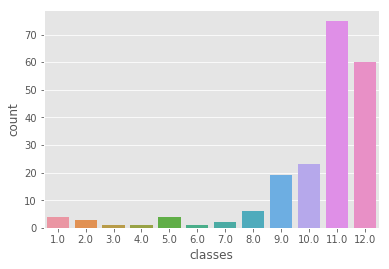

In [50]:
sns.countplot(df.classes)

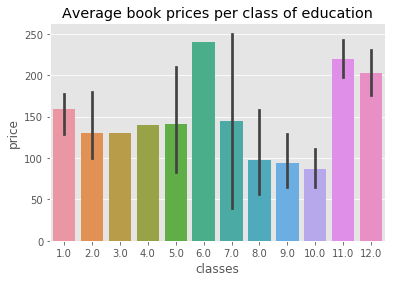

In [55]:
sns.barplot(x='classes', y='price', data=df)
plt.title('Average book prices per class of education')

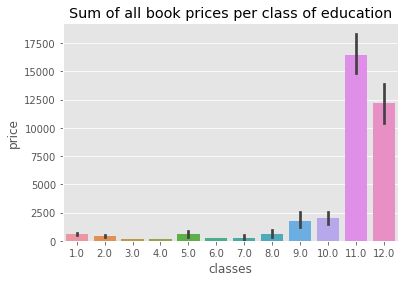

In [57]:
sns.barplot(x='classes', y='price', data=df, estimator=np.sum)
plt.title('Sum of all book prices per class of education')